# 3．推測統計の基本 ｜Pythonプログラミングを使った統計分析の基礎

### [Logics of Blue](https://logics-of-blue.com/) 馬場真哉：2019年3月1日

## 目的
- 推測統計学の基礎理論を、シミュレーションを通して学ぶ
    - 標本抽出シミュレーションの理解
    - 確率分布の理解（二項分布）
    - 仮説検定の基本（二項検定）

 
## 目次
1. [標本抽出シミュレーション](#1．標本抽出シミュレーション)
2. [統計的仮説検定の基本](#2．統計的仮説検定の基本)
3. [確率変数と確率分布の基本](#3．確率変数と確率分布の基本)


In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 表示桁数の指定
%precision 3
# グラフをjupyter Notebook内に表示させるための指定
%matplotlib inline

# 不要なワーニングを出力させない
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1．標本抽出シミュレーション

### 4人の有権者からの標本抽出

In [2]:
# 1：与党支持、0：不支持
population_4 = np.array([1, 1, 0, 0])

In [3]:
# ランダムに2人を選ぶ
# replace = Falseは、一度抽出した人を再度サンプリングしないようにする指定
# 実行するたびに結果は変わる
sample_1 = np.random.choice(population_4, size = 2, replace = False)
sample_1

array([0, 0])

In [4]:
# 支持率の計算
sp.mean(sample_1)

0.0

In [5]:
# 何度も繰り返す
for i in range(0, 10):
    sample_roop = np.random.choice(population_4, size = 2, replace = False)
    print(sp.mean(sample_roop))

0.5
0.0
0.5
0.5
0.5
0.5
0.0
0.5
0.5
0.5


<p>
    ここまでが標本抽出シミュレーションの基本的な説明です。<br>
    質問があれば受け付けます。
</p>

### 2万人の有権者からの標本抽出
1億人だと計算が重くなりすぎるので、2万人で実験します。

In [6]:
# [0, 1]を3回繰り返す
np.tile([0,1], 3)

array([0, 1, 0, 1, 0, 1])

In [7]:
# 支持する人1万人、不支持の人1万人を作る
population = np.tile([0,1], 10000)

In [8]:
# 500人を抜き出したときの支持率
sample_500 = np.random.choice(population, size = 500, replace = False)
sp.mean(sample_500)

0.47

In [9]:
# 乱数の値を固定すると、毎回同じ乱数が得られる
np.random.seed(2)
sample_500 = np.random.choice(population, size = 500, replace = False)
sp.mean(sample_500)

0.496

In [10]:
# 500人の抽出シミュレーションを10000回繰り返す

# 10000回の「標本の与党支持者数」を保持
sample_sizisya_array = np.zeros(10000)

# 10000回の「標本の与党支持率」を保持
sample_siziritu_array = np.zeros(10000)

# シミュレーションの結果を再現するため、乱数の値を固定する
np.random.seed(2)

# 10000回の標本抽出シミュレーションを実行
for i in range(0, 10000):
    sample_roop = np.random.choice(population, size = 500, replace = False)
    sample_sizisya_array[i] = sp.sum(sample_roop)
    sample_siziritu_array[i] = sp.mean(sample_roop)

print(sample_siziritu_array)

[0.496 0.456 0.536 ... 0.498 0.51  0.53 ]


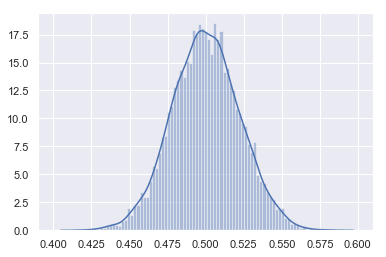

In [11]:
# 10000回の「標本の与党支持率」のヒストグラム
# 母集団の支持率は50%とわかっているのに、標本の支持率はばらつく
kaikyuu = np.linspace(0.4, 0.6, 100)
sns.distplot(sample_siziritu_array, bins = kaikyuu, norm_hist = True)

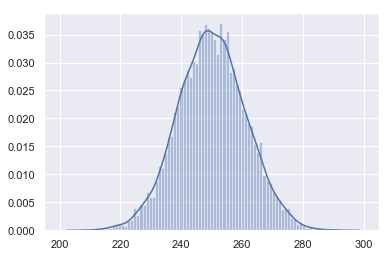

In [12]:
# 支持者の数も同様
kaikyuu = np.linspace(200, 300, 100)
sns.distplot(sample_sizisya_array, bins = kaikyuu, norm_hist = True)

In [13]:
# 10000回の「標本の与党支持率」の集計値
pd.DataFrame({"支持率":sample_siziritu_array}).describe()

,支持率
count,10000.000000
mean,0.500093
std,0.022173
min,0.416000
25%,0.484000
50%,0.500000
75%,0.514000
max,0.586000


## 2．統計的仮説検定の基本

#### 前提
現実世界でアンケート調査を行った結果、500人中、260人が与党支持だった。<br>
標本の与党支持率は52%

#### 課題
上記の標本が得られたとき、この標本が「支持率50%の母集団から得られた」と考えることに矛盾はないか？

In [14]:
# 10000回のシミュレーションの中で、標本の与党支持率が52%を上回った回数
sum(sample_siziritu_array >= 0.52)

1956

In [15]:
# 10000回のシミュレーションの中で、支持率が52%を上回った確率(割合)
# この確率がp値と呼ばれる（詳細は後述）
# この値が0.05より大きいので「今回の結果は、支持率が50%とみなしても大きな矛盾はなさそう」ということになる
sum(sample_siziritu_array >= 0.52) / 10000

0.1956

In [16]:
# シミュレーションをすることなく計算でp値を求めることも可能
# 詳細は後述するが、今回の検定は、いわゆる「片側検定」に属する
stats.binom_test(x = 260, n = 500, p = 0.5, alternative = "greater")

0.19775538571741924

## 3．確率変数と確率分布の基本

<p>
    まずはPythonを使って確率質量関数を扱う方法を説明します。<br>
    その後、標本抽出シミュレーションの結果と、二項分布から計算された確率分布とを比較します。
</p>

In [17]:
# 二項分布の確率質量関数
# 50%で表になるコインを2回投げた時、1回表が出る確率
stats.binom.pmf(n = 2, k = 1, p = 0.5)

0.5

In [18]:
# 50%で表になるコインを10回投げた時、5回表が出る確率
stats.binom.pmf(n = 10, k = 5, p = 0.5)

0.24609375000000025

In [19]:
# 50%で表になるコインを500回投げた時、260回表が出る確率
stats.binom.pmf(n = 500, k = 260, p = 0.5)

0.02392329606092036

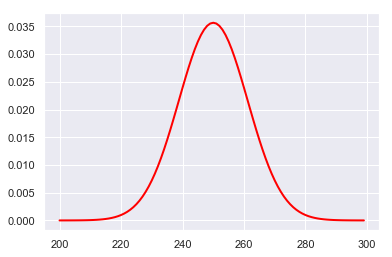

In [20]:
# 50%で表になるコインを500回投げた時の、「表が出る回数」の確率分布

# 200～300の範囲で「表が出る回数」を指定。
m = np.arange(200,300,1)

# 確率質量関数を使って、表が200回出る確率、201回出る確率……300回出る確率を各々計算する
pmf_binomial = stats.binom.pmf(n = 500, k = m, p = 0.5)

# 確率質量関数の折れ線グラフ
plt.plot(m, pmf_binomial, color = 'red', linewidth = 2)

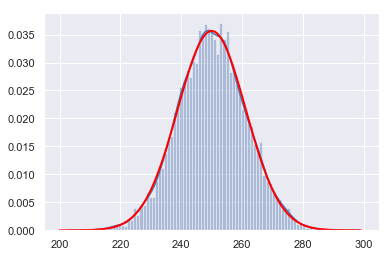

In [21]:
# ヒストグラムと二項分布の確率分布を重ね合わせる
# ほとんど一致していることがわかる

# シミュレーションで得られた支持者の数のヒストグラム
sns.distplot(sample_sizisya_array, bins = kaikyuu, norm_hist = True)

# 確率質量関数の折れ線グラフ
plt.plot(m, pmf_binomial, color = 'red', linewidth = 2)

### 二項分布を使って、シミュレーションデータを作成（np.random.choiceの代わり）

シミュレーションをしなくても同様の結果が得られると先ほど示しましたが、<br>
シミュレーションを簡単にするという目的でも二項分布は活用できます。

In [22]:
# 表が出る確率が50%（p=0.5）のコインを500回（n=500）投げた時に、表が出る回数を、10回記録（size=10）
stats.binom.rvs(n = 500, p = 0.5, size = 10)

array([279, 261, 257, 241, 262, 254, 250, 243, 269, 261])

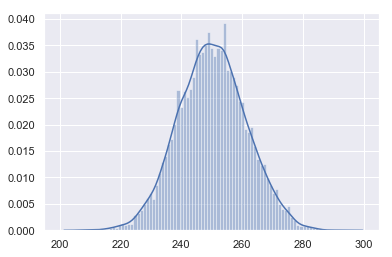

In [23]:
# 表が出る確率が50%（p=0.5）のコインを500回（n=500）投げた時に、表が出る回数を、10000回記録（size=10000）
simu_binom = stats.binom.rvs(n = 500, p = 0.5, size = 10000)

# ヒストグラムを描く（先ほどのシミュレーションとほぼ同じ結果になる）
kaikyuu = np.linspace(200, 300, 100)
sns.distplot(simu_binom, bins = kaikyuu, norm_hist = True)

### 補足：パラメタを変えた時の二項分布

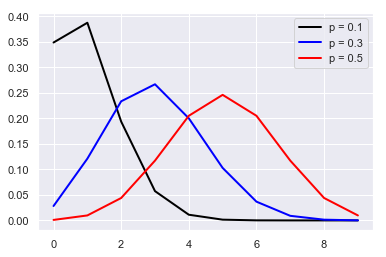

In [24]:
#「表が出た回数」を指定。
m = np.arange(0,10,1)

# パラメタを様々変える（Nは常に10回）
pmf_binomial_p01 = stats.binom.pmf(n = 10, k = m, p = 0.1)
pmf_binomial_p03 = stats.binom.pmf(n = 10, k = m, p = 0.3)
pmf_binomial_p05 = stats.binom.pmf(n = 10, k = m, p = 0.5)

# 確率質量関数の折れ線グラフ
plt.plot(m, pmf_binomial_p01, color = 'black', linewidth = 2, label="p = 0.1")
plt.plot(m, pmf_binomial_p03, color = 'blue' , linewidth = 2, label="p = 0.3")
plt.plot(m, pmf_binomial_p05, color = 'red'  , linewidth = 2, label="p = 0.5")

# 凡例を付ける
plt.legend(loc='upper right')

### p値を計算する

In [25]:
# 50%で表になるコインを500回投げた時の、「表が出る回数」の確率分布

# 260～500の範囲で「表が出る回数」を指定。
m = np.arange(260,501,1)

# 確率質量関数を使って、表が260回出る確率、261回出る確率……500回出る確率を各々計算する
pmf_binomial = stats.binom.pmf(n = 500, k = m, p = 0.5)

# 260回以上が表になる確率
sp.sum(pmf_binomial)

0.19775538571739595

In [26]:
# シミュレーションの結果と大体一緒
sum(sample_siziritu_array >= 0.52) / 10000

0.1956

In [27]:
# binom_test関数を使うと、もっと簡単に計算できる
stats.binom_test(x = 260, n = 500, p = 0.5, alternative = "greater")

0.19775538571741924